# **Project Title** :

# 📉 Predicting Customer Churn for Subscription-Based Businesses

##  Project Overview

In today's competitive digital economy, subscription-based businesses face a major challenge: **customer churn**. Companies lose millions in revenue due to churn, often without understanding the root causes. This project aims to tackle that challenge by analyzing customer behavior patterns, engagement rates, and transaction data to **predict churn risk** and provide actionable insights.

## Problem Statement

> **"Businesses lose millions due to customer churn, but most don't know why people leave."**

The inability to detect early churn signals limits a company's capacity to respond proactively. Understanding *why* customers churn is just as critical as *knowing* who will churn.

---

## Project Solution

This project uses a combination of **exploratory data analysis (EDA)**, **feature engineering**, and **data visualization** to uncover trends that lead to customer churn. I also leverage predictive modeling techniques to identify at-risk customers before they leave.

## **Business Objectives**


1. **Understand churn behavior** by identifying customer usage patterns and common churn traits.
2. **Determine key factors** that influence customer churn.
3. **Quantify the business impact** of churn (e.g., revenue loss, customer lifetime value).
4. **Predict churn risk** using machine learning.
5. **Communicate findings** through storytelling using Tableau dashboards.
6. **Recommend strategies** for churn mitigation and customer retention.


## Dataset Understanding

- **Source**: Kaggle  
  [`Predictive Analytics for Customer Churn: Dataset`](https://www.kaggle.com/datasets/safrin03/predictive-analytics-for-customer-churn-dataset)

  Data is contained under folder **data** which contains three files.

  1. **data_description.csv** - shows more information about dataset
  2. **train.csv** - contains all data in csv format for train
  3. **test.csv** - used for testing the model after training

- **Key Columns**:
  - `CustomerID`: Unique customer identifier  
  - `SubscriptionType`: Basic, Premium, or Deluxe  
  - `PaymentMethod`, `PaperlessBilling`  
  - `ViewingHoursPerWeek`, `AccountAge`, `TotalCharges`, `MonthlyCharges`  
  - `SupportTicketsPerMonth`, `UserRating`, `WatchlistSize`, etc.  


In cell bellow I import all Libraries with there alias

In [1]:
# import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cell below load data using pandas for data preparation and cleaning

In [34]:
# load data

churn_df = pd.read_csv('data/train.csv')
churn_df.head(10)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0
5,113,7.295744,824.419081,Premium,Mailed check,Yes,Both,No,Mobile,21.678290,...,35,Comedy,3.721134,8,Female,2,Yes,Yes,JY5HS0GWHW,0
6,38,12.340675,468.945639,Premium,Bank transfer,No,Both,No,Computer,36.512761,...,28,Action,4.090868,9,Female,20,No,Yes,79XSO6P5O3,0
7,25,7.247550,181.188753,Standard,Electronic check,Yes,TV Shows,No,TV,16.355816,...,10,Fantasy,3.410221,2,Female,22,No,No,2LDC9AQ3C5,0
8,26,19.803233,514.884050,Standard,Bank transfer,No,Movies,No,Tablet,8.202929,...,28,Fantasy,2.679986,0,Male,5,Yes,Yes,74DURHL3Y8,1
9,14,18.842934,263.801080,Standard,Bank transfer,No,Movies,No,Computer,38.560694,...,0,Comedy,2.993441,0,Male,18,No,No,CY8S2R3A1T,0


In cell above loads data and stores it under variable `churn_df` and output first `5` records of data using `.head()` method


Cell below I perform metadata summary  using **.info() method** to understand data interms of `data types`, `no of records`, `no of attributes` and `missing values`

In [3]:
# perform metadata summary

churn_df.info()  # Reveals missing data and dtype mismatches


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [4]:
"""The cell above shows that `churn_df` as total number of 243787 entries and 21 attributes.

churn_df as `5 float64 dtypes`, `5 int64 dtypes` and `11 object dtypes`.

There are no missing values."""

'The cell above shows that `churn_df` as total number of 243787 entries and 21 attributes.\n\nchurn_df as `5 float64 dtypes`, `5 int64 dtypes` and `11 object dtypes`.\n\nThere are no missing values.'

Below I find stastical summary of float and integer field using `.describe() method`

In [5]:
# statistics summary
churn_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


Cell above shows a quik summary of numeric number by showing `count, mean, std, min percitiles & max`.

Below I check dataframe shape using **.shape() method**

In [6]:
# check shape of the dataset
churn_df.shape

(243787, 21)

Cell above shows that churn_df as `243787 rows` and `21 columns`.

### **Data Cleaning**

In this section, I prepared the dataset for analysis and modeling by performing the following steps:

* **Handled Missing Values**
Identified and addressed null values using appropriate imputation strategies (mean, median, mode).

* **Removed Duplicates**
Checked for and removed any duplicate customer records to ensure data integrity.

* **Corrected Data Types**
Converted columns like TotalCharges to numeric types and ensured categorical fields were properly formatted.

* **Handled Outliers**
Detected and addressed extreme values in fields such as MonthlyCharges and SupportTicketsPerMonth.


For efficient data cleaning I group churn_df in `numeric_df` and `categorical_df` which stores numeric and categorical in different dataframe for cleaning.

In cell below I start with **numeric values** for cleaning and preparing for analysis


In [7]:
# select numeric columns from the dataset

numeric_df =churn_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_df

['AccountAge',
 'MonthlyCharges',
 'TotalCharges',
 'ViewingHoursPerWeek',
 'AverageViewingDuration',
 'ContentDownloadsPerMonth',
 'UserRating',
 'SupportTicketsPerMonth',
 'WatchlistSize',
 'Churn']

The above cell I select all numeric columns in churn_df and store them under variable `numeric_df`

In [8]:
# check shape of numeric_df
churn_df[numeric_df].shape

(243787, 10)

The above cell shows shape of numeric_df which as `243787 rows` and `10 columns`

In cell below I check for missing values in numeric_df using method like `.isna(), isnull, notna()`

In [9]:
# check for missing values

(churn_df[numeric_df].isna().sum() / len(churn_df[numeric_df]))* 100 # check for missing values in numeric_df in percentage

AccountAge                  0.0
MonthlyCharges              0.0
TotalCharges                0.0
ViewingHoursPerWeek         0.0
AverageViewingDuration      0.0
ContentDownloadsPerMonth    0.0
UserRating                  0.0
SupportTicketsPerMonth      0.0
WatchlistSize               0.0
Churn                       0.0
dtype: float64

The above cell shows there are no missing values in numeric_df


In cell below checks for **Duplicates values** in numeric_df using `.duplicated()`

In [10]:
# check for duplicates in numeric_df

churn_df[numeric_df].duplicated().sum() # check for duplicates in numeric_df

np.int64(0)

Cell above shows there are no duplicates in numeric_df

The cell below I check for **outliers in numeric_df** using `boxplot` to check for extreme values

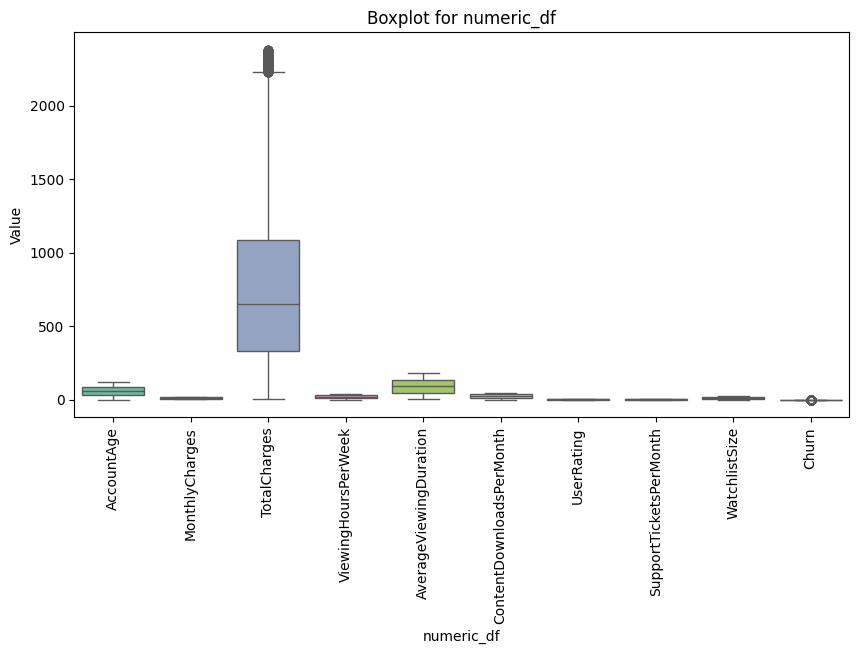

In [11]:
# check for outliers in numeric_df

# boxplot for numeric_df
fig, ax =plt.subplots(figsize=(10,5))
sns.boxplot(churn_df[numeric_df], orient='v', palette='Set2')

ax.set_title('Boxplot for numeric_df')
ax.set_xlabel('numeric_df')
ax.set_ylabel('Value')
ax.tick_params(axis='x', rotation=90) # Rotate x-axis labels for better readability

plt.show()




Cell above show **column TotalCharges contains outliers** as there many dots above. Other columns are relatively clean does not have much outliers.

To remove the outliers write a function called **remove_outliers_iqr** which take two argument **dataframe and column**

In [12]:
# function to remove outliers

def remove_outliers_iqr(df, column):
    """
    Remove outliers from a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    column (str): The column name to check for outliers.
    
    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# remove outliers from numeric_df['TotalCharges']

churn_df = remove_outliers_iqr(churn_df, 'TotalCharges')

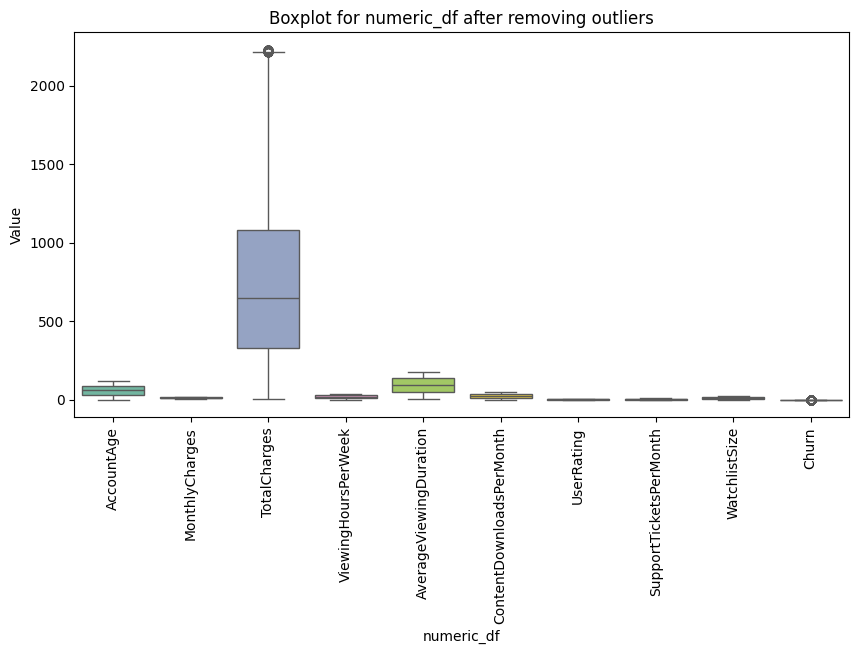

In [13]:
# check for outliers in numeric_df after removing outliers
fig, ax =plt.subplots(figsize=(10,5))
sns.boxplot(churn_df[numeric_df], orient='v', palette='Set2')
ax.set_title('Boxplot for numeric_df after removing outliers')
ax.set_xlabel('numeric_df')
ax.set_ylabel('Value')
ax.tick_params(axis='x', rotation=90) # Rotate x-axis labels for better readability
plt.show()

The cell above shows outliers have been removed successfully

For **numeric_df** data is clean and ready for analysis after cleaning

In cell below I select all categorical columns in churn_df for cleaning and prepare for analysis.
The values are stored under variable `categorical_df`

In [14]:
# select categorical columns from the dataset

categorical_df =  churn_df.select_dtypes(include=[np.object_]).columns.tolist()
categorical_df

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled',
 'CustomerID']

In cell above  I selects all categorical columns from churn_df and store them under variable `categorical_df`

In cell below I check for `values_counts` which shows **unique values** in dataframe 

In [15]:
# values_counts for categorical_df

churn_df[categorical_df].value_counts().sum()



np.int64(243046)

The cell above shows that categorical_df might be have some few duplicates as it unique values are 243046 from 243787.

In cell below I check for duplicates

In [16]:
# check for duplicates in categorical_df

churn_df[categorical_df].duplicated().sum() # check for duplicates in categorical_df

np.int64(0)

Cell above shows categorical_df contains no duplicates so maybe the the the value of categorical unique value shows the 

In [17]:
# check for missing values in categorical_df

(churn_df[categorical_df].isna().sum() / len(churn_df[categorical_df]))* 100 # check for missing values in categorical_df in percentage

SubscriptionType     0.0
PaymentMethod        0.0
PaperlessBilling     0.0
ContentType          0.0
MultiDeviceAccess    0.0
DeviceRegistered     0.0
GenrePreference      0.0
Gender               0.0
ParentalControl      0.0
SubtitlesEnabled     0.0
CustomerID           0.0
dtype: float64

Cell Above shows categorical_df as no duplicates 

In [ ]:
churn_df.shape # check shape of the dataset after removing outliers

(243046, 21)

## **EXPLATORARY DATA ANALYSIS(EDA)**

#### **Goals** :

Find patterns and trends that facilitates churn of customers.

To achieve this I derieved the following guiding objectives for entire analysis:

**Guiding Questions for Customer Churn Analysis**

1. **General Customer Behavior**

* What are the common behavior patterns or usage trends among churned customers?
* How does customer engagement differ between churned and retained users?
e.g., viewing hours per week, content downloads per month, user rating, support tickets.
* What factors contribute most to customer churn?

2. **Subscription Plan & Engagement**

* Which subscription plan has the highest churn rate? (Basic, Premium, Deluxe)
* Does the type of content watched influence churn?
* Do churned customers have a lower or higher number of downloads per month?
* Is watchlist size affected before churn?
* Do churned customers have lower account age or engagement duration?

3. **Demographics & User Profile**

* Are churned customers mostly male or female?
* What is the age distribution of churned customers compared to retained ones?
* Do they mostly use one type of device (e.g., mobile, tablet, smart TV)?
* Are there specific user segments (e.g., genre preference, multi-device access) that are more likely to churn?

4. **Billing & Payment Behavior**

* Do churned users mostly use a specific payment method?
* How do their monthly charges and total charges compare to retained customers?
* Are certain payment methods or billing preferences linked to higher churn?
* Does a drop in total monthly charges correlate with churn?

5. **Parental Controls & User Settings**

* Does enabling or disabling parental controls impact churn?
* Are customers who enable subtitles more or less likely to churn?
* How does having multiple device access affect churn?

6. **Time-Based Trends**

* How has churn rate changed over time (monthly/yearly)?
* Are there seasonal spikes or drops in churn rate?

7. **Retention Strategy Insights**

* Are there early warning signs (drop in engagement, support tickets) that a customer is about to churn?
* What actionable retention strategies can be suggested based on behavior patterns?
* How can customer lifetime value (CLV) be maximized using these insights?

In [19]:
# differentiating between churners and non-churners
churn_df['Churn'].value_counts() # check for churners and non-churners

Churn
0    198952
1     44094
Name: count, dtype: int64

The above cell I check for total number of customers who churned and not. `0 shows those not churned` and `1 shows those hurned`



Perform correlation for numeric values to identify strongly correlated attribute to churn

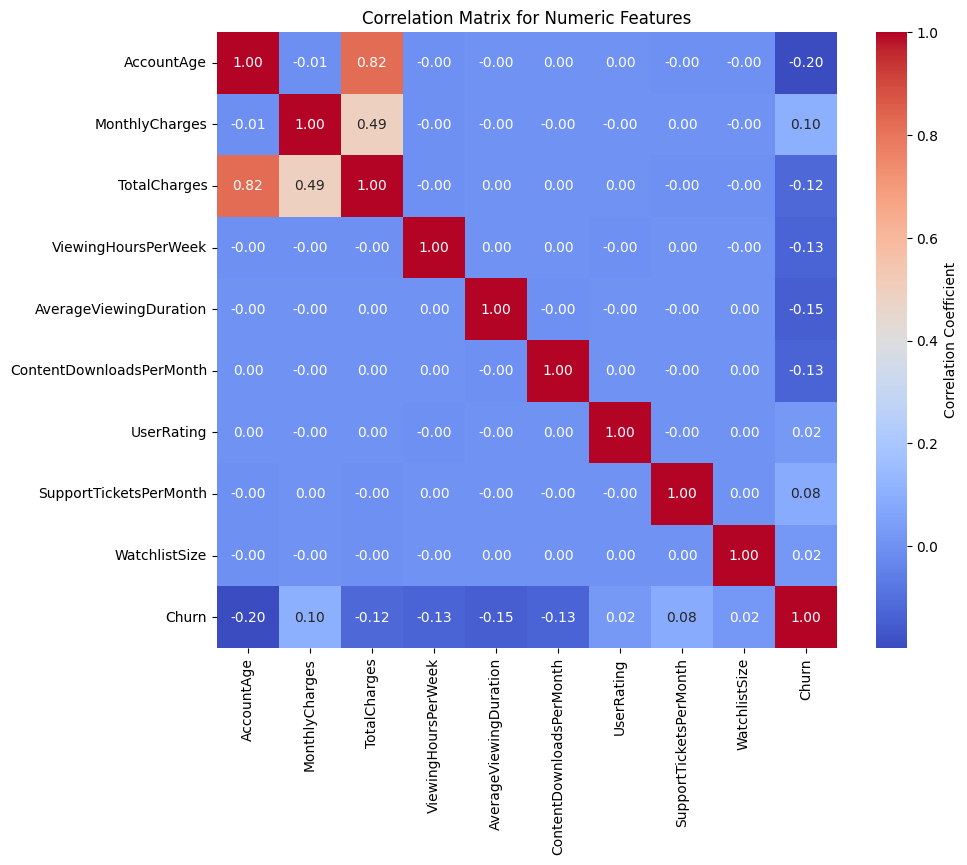

In [20]:
# correlation matrix for numeric_df

corr = churn_df[numeric_df].corr()

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', ax=ax, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix for Numeric Features')
plt.show()


No single numeric feature alone explains churn well.

Churn is likely a multifactorial problem where interaction effects (e.g. low watch time + high monthly cost) matter more than individual variables.



Cell below **finds which behaviour patterns or usage trends are common among customers who churn

I groupby data by `churn` and find the aggregation of attribute such as subscription, payment method etc

In [29]:
# finds the  behavior of the churners and non-churners in the dataset

# group by churn and calculate the mean attribute values

churn_grouped = churn_df.groupby('Churn').agg({
    'AccountAge': 'mean',
    'TotalCharges': 'mean',
    'MonthlyCharges': 'mean',
    'SupportTicketsPerMonth': 'mean',
    'AverageViewingDuration': 'mean',
    'ViewingHoursPerWeek': 'mean',
    'ContentDownloadsPerMonth' : 'mean',
    
}).reset_index()

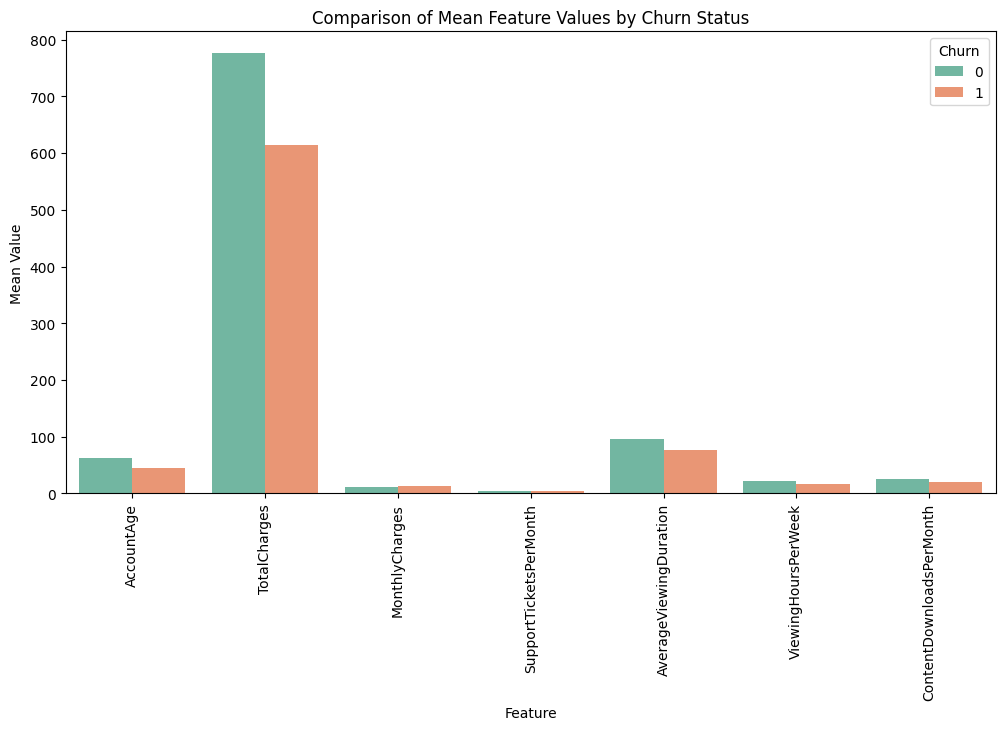

In [33]:
# Set 'Churn' column as index before transposing
churn_grouped_transposed = churn_grouped.set_index('Churn').T
churn_grouped_transposed.reset_index(inplace=True)
churn_grouped_transposed.rename(columns={'index': 'Feature'}, inplace=True)


# plot the churn_grouped dataframe
fig, ax = plt.subplots(figsize=(12, 6))

# Melt the data to long format so we can plot with hue
df_melted = churn_grouped_transposed.melt(id_vars='Feature', var_name='Churn', value_name='MeanValue')

sns.barplot(x='Feature', y='MeanValue', hue='Churn', data=df_melted, palette='Set2')

ax.set_title('Comparison of Mean Feature Values by Churn Status')
ax.set_xlabel('Feature')
ax.set_ylabel('Mean Value')
ax.tick_params(axis='x', rotation=90)
ax.legend(title='Churn', loc='upper right')
plt.show()



### **Observations** :

**Total Charges**:

* Customers who did not churn have significantly higher total charges.
* This suggests that loyal customers tend to stay longer and hence accumulate more charges over time.

**Account Age**:

* Non-churners have a higher account age, indicating that customers who have been subscribed longer are less likely to churn.
* This reinforces the idea that early churn is more common, and once customers cross a certain tenure, they are likely to stay.

**Average Viewing Duration**:

* Non-churners show higher average viewing duration than churners.
* This implies that more engaged users, who consume more content, are less likely to leave.

**Viewing Hours Per Week**:
* Similar to the above, churners watch fewer hours per week, showing lower engagement.
* Content Downloads Per Month:
* Non-churners download more content, indicating they are more active on the platform and find value in it.

**Monthly Charges**:

* There is little difference in monthly charges between churners and non-churners, suggesting that pricing alone may not be a key churn factor.

**Support Tickets Per Month**:

* Churners might have a slightly higher support ticket count, though the values are small. This could imply frustration or issues with the service leading to churn.




Cell below I encode categorical values to find the patterns for non-churners and churners.

First I check for multiclass and binary categories using `value_count()`


In [42]:
# List of categorical columns
categorical_cols = [
    'SubscriptionType',
    'PaymentMethod',
    'PaperlessBilling',
    'ContentType',
    'MultiDeviceAccess',
    'DeviceRegistered',
    'GenrePreference',
    'Gender',
    'ParentalControl',
    'SubtitlesEnabled'
]

# Loop through and display value counts for each
for col in categorical_cols:
    print(f"Value counts for '{col}':")
    print(churn_df[col].value_counts(dropna=False))
    print("-" * 40)


Value counts for 'SubscriptionType':
SubscriptionType
Standard    81920
Basic       81050
Premium     80817
Name: count, dtype: int64
----------------------------------------
Value counts for 'PaymentMethod':
PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64
----------------------------------------
Value counts for 'PaperlessBilling':
PaperlessBilling
No     121980
Yes    121807
Name: count, dtype: int64
----------------------------------------
Value counts for 'ContentType':
ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64
----------------------------------------
Value counts for 'MultiDeviceAccess':
MultiDeviceAccess
No     122035
Yes    121752
Name: count, dtype: int64
----------------------------------------
Value counts for 'DeviceRegistered':
DeviceRegistered
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: count, dt

In [43]:
churn_df[categorical_df]['ContentType'].value_counts()

ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64

In [54]:
# create a copy of the churn_df for encoding
churn_encoded = churn_df.copy()

# encode ('Basic': 0, 'Standard': 1, 'Premium': 2)
churn_encoded['SubscriptionType'] = churn_encoded['SubscriptionType'].map({'Basic': 0, 'Standard': 1, 'Premium': 2})

# ('movies' : 0, 'TV shows' : 1, 'Both' : 2)
churn_encoded['ContentType'] = churn_encoded['ContentType'].map({'movies' : 0, 'TV shows' : 1, 'Both' : 2})
# ('No' : 0, 'Yes' : 1)
churn_encoded['PaperlessBilling'] = churn_encoded['PaperlessBilling'].map({'No': 0, 'Yes': 1})
churn_encoded['MultiDeviceAccess'] = churn_encoded['MultiDeviceAccess'].map({'No': 0, 'Yes': 1})
churn_encoded['DeviceRegistered'] = churn_encoded['DeviceRegistered'].map({'No': 0, 'Yes': 1})
churn_encoded['ParentalControl'] = churn_encoded['ParentalControl'].map({'No': 0, 'Yes': 1})
churn_encoded['SubtitlesEnabled'] = churn_encoded['SubtitlesEnabled'].map({'No': 0, 'Yes': 1})
# (comedy':0, 'Fantasy':1, 'Drama' : 2, 'Action' : 3, 'Sci-Fi' :4)
churn_encoded['GenrePreference'] = churn_encoded['GenrePreference'].map({'comedy':0, 'Fantasy':1, 'Drama' : 2, 'Action' : 3, 'Sci-Fi' :4})
churn_encoded['SubtitlesEnabled'] = churn_encoded['SubtitlesEnabled'].map({'No': 0, 'Yes': 1})
churn_encoded['Gender']= churn_encoded['Gender'].map({'Female' :0, 'Male' :1})
# ('Credit card' :0, 'Bank transfer' :1, 'Electronic check' :2, 'Mailed check' :3)
churn_encoded['PaymentMethod'] = churn_encoded['PaymentMethod'].map({'Credit card' :0, 'Bank transfer' :1, 'Electronic check' :2, 'Mailed check' :3})


In [50]:
# check the shape of the churn_encoded dataframe
churn_encoded.shape

(243787, 21)

In [55]:
# Group by 'Churn' and calculate the sum of each categorical feature
cat_grouped = churn_encoded.groupby('Churn').agg({
    'GenrePreference': 'sum',
    'SubscriptionType': 'sum',
    'PaymentMethod': 'sum',
    'PaperlessBilling': 'sum',
    'ContentType': 'sum',
    'MultiDeviceAccess': 'sum',
    'DeviceRegistered': 'sum',
    'ParentalControl': 'sum',

}).reset_index()

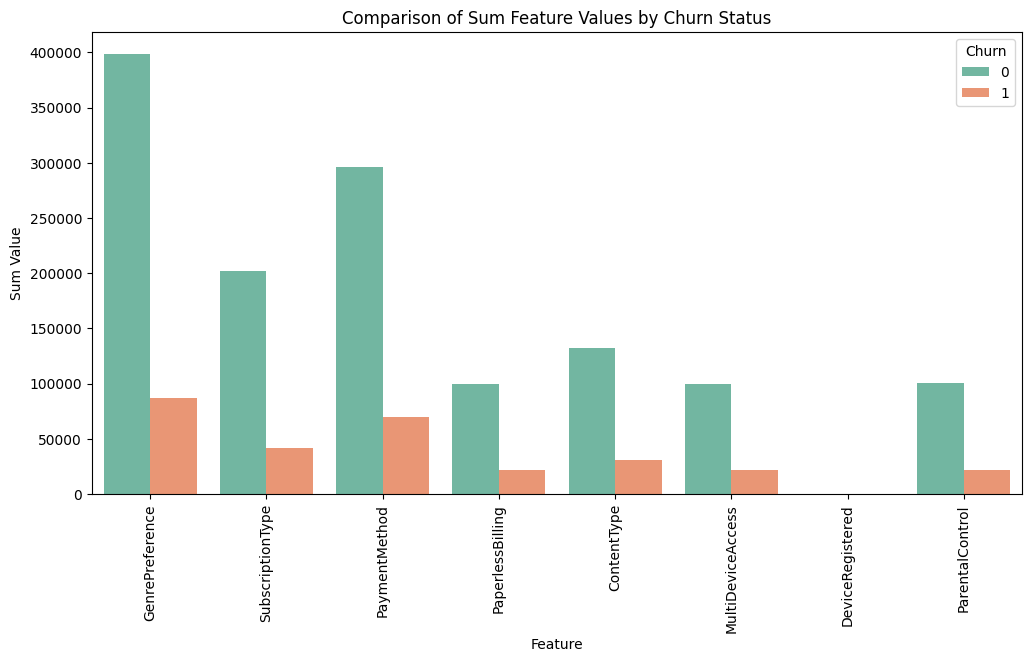

In [56]:
# plot the cat_grouped dataframe
fig, ax = plt.subplots(figsize=(12, 6))
# Melt the data to long format so we can plot with hue
df_melted = cat_grouped.melt(id_vars='Churn', var_name='Feature', value_name='SumValue')
sns.barplot(x='Feature', y='SumValue', hue='Churn', data=df_melted, palette='Set2')
ax.set_title('Comparison of Sum Feature Values by Churn Status')
ax.set_xlabel('Feature')
ax.set_ylabel('Sum Value')
ax.tick_params(axis='x', rotation=90)
ax.legend(title='Churn', loc='upper right')
plt.show()

Need to undestand more

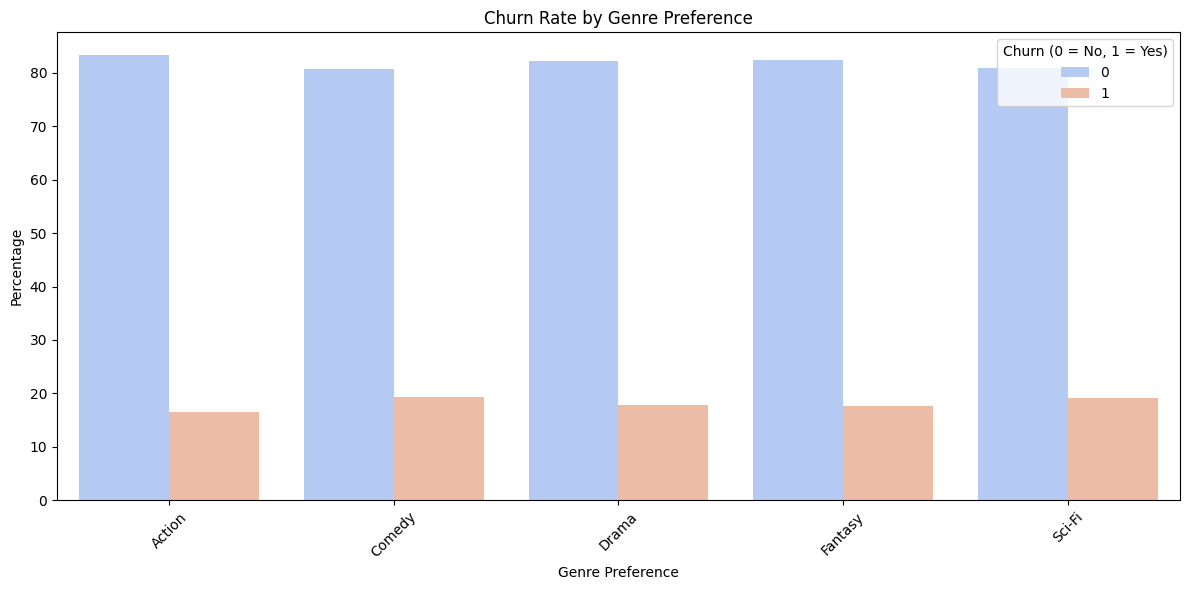

In [62]:


# Create a normalized frequency table of churn by genre
genre_churn = churn_df.groupby(['GenrePreference', 'Churn']).size().reset_index(name='Count')

# Normalize to get percentages within each genre
genre_churn['Percent'] = genre_churn.groupby('GenrePreference')['Count'].transform(lambda x: x / x.sum() * 100)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='GenrePreference', y='Percent', hue='Churn', data=genre_churn, palette='coolwarm')

plt.title('Churn Rate by Genre Preference')
plt.xlabel('Genre Preference')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()
